In [1]:
import math
import os
import random
from dataclasses import dataclass

import graphviz
import matplotlib.pyplot as plt
import numpy as np
import pydot
import tensorflow as tf
from IPython.display import SVG
from keras import models
from keras.layers import (Activation, Add, AveragePooling2D,
                          BatchNormalization, Concatenate, Conv2D, Dense,
                          Flatten, GlobalAveragePooling2D, Input, MaxPooling2D,
                          Softmax)
from keras.utils import img_to_array, load_img
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import model_to_dot
from tqdm import tqdm
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


# Part 1

In [2]:
def f(x, y):
    return x**2 + y**2 + x*(y + 2) + math.cos(3*x)

def dfdx(x, y):
    return 2*x + y + 2 - 3*math.sin(3*x)

def dfdy(x, y):
    return 2*y + x

In [3]:
@dataclass
class GDPoint():
    x: int
    y: int
    z: int

In [4]:
def gradient_descent(x, y, lr, steps=20):
    data_points = []
    for _ in range(steps):
        z = f(x, y)
        data_points.append(GDPoint(x, y, z))
        dx = dfdx(x, y)
        dy = dfdy(x, y)
        x -= dx * lr
        y -= dy * lr
    return x, y, data_points

In [5]:
results =  []
for x_init in range(-10, 10):
    for y_init in range(-10, 10):
        x_final, y_final, values = gradient_descent(x_init, y_init, 0.1, 100)
        results.append(values)

x_final=-1.0881624094117672, y_final=0.5440812010518068, values[-1]=GDPoint(x=-1.088162409312122, y=0.5440812001507432, z=-2.280709708147053)


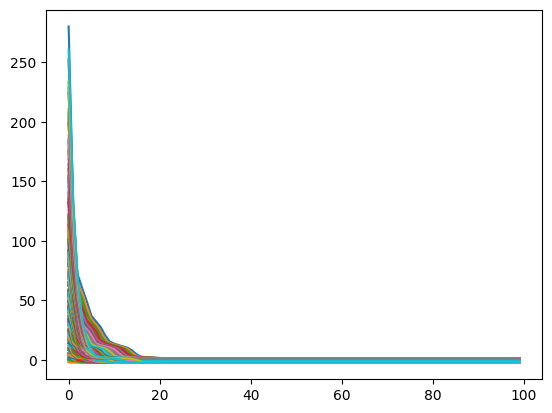

In [6]:
print(f'{x_final=}, {y_final=}, {values[-1]=}')
fig = plt.figure()
ax = fig.add_subplot()
for result in results:
    zs = [d.z for d in result]
    ax.plot(zs)


# Part 2

In [34]:
def getVGG19():
    L2 = 0.0005
    inputs = Input(shape=(32, 32, 3))
    x = Conv2D(64, kernel_size=3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(L2), input_shape=(32, 32, 3))(inputs)
    x = BatchNormalization()(x)
    x = Conv2D(64, kernel_size=3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(L2))(x)
    x = BatchNormalization()(x)
    
    x = MaxPooling2D(pool_size=2, strides=2, padding='same')(x)
    
    x = Conv2D(128, kernel_size=3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(L2))(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, kernel_size=3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(L2))(x)
    x = BatchNormalization()(x)
    
    x = MaxPooling2D(pool_size=2, strides=2, padding='same')(x)
    
    x = Conv2D(256, kernel_size=3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(L2))(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, kernel_size=3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(L2))(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, kernel_size=3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(L2))(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, kernel_size=3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(L2))(x)
    x = BatchNormalization()(x)
    
    x = MaxPooling2D(pool_size=2, strides=2, padding='same')(x)
    
    x = Conv2D(512, kernel_size=3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(L2))(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, kernel_size=3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(L2))(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, kernel_size=3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(L2))(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, kernel_size=3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(L2))(x)
    x = BatchNormalization()(x)
    
    x = MaxPooling2D(pool_size=2, strides=2, padding='same')(x)
    
    x = Conv2D(512, kernel_size=3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(L2))(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, kernel_size=3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(L2))(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, kernel_size=3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(L2))(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, kernel_size=3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(L2))(x)
    x = BatchNormalization()(x)
    
    x = MaxPooling2D(pool_size=2, strides=2, padding='same')(x)
    
    x = Flatten()(x)
    x = Dense(4096, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(L2))(x)
    x = BatchNormalization()(x)
    x = Dense(4096, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(L2))(x)
    x = BatchNormalization()(x)
    x = Dense(4096, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(L2))(x)
    x = BatchNormalization()(x)
    x = Dense(10, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(L2))(x)

    model = models.Model(
        inputs=inputs,
        outputs=x
    )
    model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])
    return model

In [44]:
#  https://towardsdatascience.com/understand-and-implement-resnet-50-with-tensorflow-2-0-1190b9b52691
def resnetIdentity(x, filters, L2):
    x_skip = x
    f1, f2 = filters
    x = Conv2D(f1, kernel_size=1, padding='valid', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(L2))(x)
    x = BatchNormalization()(x)
    x = Conv2D(f1, kernel_size=3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(L2))(x)
    x = BatchNormalization()(x)
    x = Conv2D(f2, kernel_size=1, padding='valid')(x)
    x = Add()([x, x_skip])
    x = Activation(tf.keras.activations.relu)(x)
    x = BatchNormalization()(x)
    return x

def resnetConv(x, s, filters, L2):
    x_skip = x
    f1, f2 = filters
    x = Conv2D(f1, kernel_size=1, strides=s, padding='valid', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(L2))(x)
    x = BatchNormalization()(x)
    x = Conv2D(f1, kernel_size=3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(L2))(x)
    x = BatchNormalization()(x)
    x = Conv2D(f2, kernel_size=1, padding='valid', kernel_regularizer=tf.keras.regularizers.l2(L2))(x)
    x_skip = Conv2D(f2, kernel_size=1, strides=s, padding='valid', kernel_regularizer=tf.keras.regularizers.l2(L2))(x_skip)
    x = Add()([x, x_skip])
    x = Activation(tf.keras.activations.relu)(x)
    x = BatchNormalization()(x)
    return x

def getResnet50():
    L2 = 0.001
    inp = Input(shape=(32, 32, 3))
    x = Conv2D(64, kernel_size=7, strides=2, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(L2))(inp)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=3, strides=2)(x)
    x = resnetConv(x, s=1, filters=(64,256), L2=L2)
    x = resnetIdentity(x, filters=(64,256), L2=L2)
    x = resnetIdentity(x, filters=(64,256), L2=L2)
    
    x = resnetConv(x, s=2, filters=(128, 512), L2=L2)
    x = resnetIdentity(x, filters=(128, 512), L2=L2)
    x = resnetIdentity(x, filters=(128, 512), L2=L2)
    x = resnetIdentity(x, filters=(128, 512), L2=L2)
    
    x = resnetConv(x, s=2, filters=(256, 1024), L2=L2)
    x = resnetIdentity(x, filters=(256, 1024), L2=L2)
    x = resnetIdentity(x, filters=(256, 1024), L2=L2)
    x = resnetIdentity(x, filters=(256, 1024), L2=L2)
    x = resnetIdentity(x, filters=(256, 1024), L2=L2)
    x = resnetIdentity(x, filters=(256, 1024), L2=L2)
    
    x = resnetConv(x, s=2, filters=(512, 2048), L2=L2)
    x = resnetIdentity(x, filters=(512, 2048), L2=L2)
    x = resnetIdentity(x, filters=(512, 2048), L2=L2)
    
    x = AveragePooling2D(pool_size=2, padding='same')(x)
    x = Flatten()(x)
    x = Dense(10, activation='softmax')(x)
    
    model = models.Model(
        inputs=inp,
        outputs=x
    )
    model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])
    return model

In [56]:
#  https://towardsdatascience.com/creating-densenet-121-with-tensorflow-edbc08a956d8
def denseBlock(x, repetitions):
    for _ in range(repetitions):
        y = Conv2D(128, kernel_size=1, strides=1, padding='same', activation='relu')(x)
        y = BatchNormalization()(y)
        y = Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu')(y)
        y = BatchNormalization()(y)
        x = Concatenate()((y, x))
    return x

def getDenseNet():
    inp = Input(shape=(32, 32, 3))
    x = Conv2D(64, kernel_size=7, strides=2, padding='same', activation='relu')(inp)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=3, strides=2, padding='same')(x)
    
    x = denseBlock(x, 6)
    
    x = Conv2D(128, kernel_size=1, strides=1, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = AveragePooling2D(pool_size=2, strides=2, padding='same')(x)
    
    x = denseBlock(x, 12)
    
    x = Conv2D(256, kernel_size=1, strides=1, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = AveragePooling2D(pool_size=2, strides=2, padding='same')(x)
    
    x = denseBlock(x, 24)
    
    x = Conv2D(512, kernel_size=1, strides=1, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = AveragePooling2D(pool_size=2, strides=2, padding='same')(x)
    
    x = denseBlock(x, 16)
    
    x = GlobalAveragePooling2D()(x)
    out = Dense(10, activation='softmax')(x)
    
    model = models.Model(
        inputs=inp,
        outputs=out
    )
    model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])
    return model

In [59]:
def mlpconvLayer(x, L2):
    x = Conv2D(192, kernel_size=3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(L2))(x)
    x = BatchNormalization()(x)
    x = Conv2D(192, kernel_size=1, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(L2))(x)
    x = BatchNormalization()(x)
    x = Conv2D(192, kernel_size=1, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(L2))(x)
    x = BatchNormalization()(x)
    return x

def getNiN():
    L2 = 0.0001
    inp = Input(shape=(32, 32, 3))
    x = Conv2D(128, kernel_size=3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(L2))(inp)
    x = BatchNormalization()(x)
    
    x = mlpconvLayer(x, L2)
    x = MaxPooling2D(pool_size=3, strides=2, padding='same')(x)
    x = mlpconvLayer(x, L2)
    x = MaxPooling2D(pool_size=3, strides=2, padding='same')(x)
    x = mlpconvLayer(x, L2)
    
    x = Conv2D(10, kernel_size=1, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(L2))(x)
    x = BatchNormalization()(x)
    x = GlobalAveragePooling2D()(x)
    x = Flatten()(x)
    x = Softmax()(x)
    
    model = models.Model(
        inputs=inp,
        outputs=x
    )
    model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])
    return model

In [47]:
vgg19 = getVGG19()
vgg19.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_216 (Conv2D)         (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_19 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_217 (Conv2D)         (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_20 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 16, 16, 64)       0   

In [48]:
resnet50 = getResnet50()
resnet50.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_232 (Conv2D)            (None, 16, 16, 64)   9472        ['input_7[0][0]']                
                                                                                                  
 batch_normalization_38 (BatchN  (None, 16, 16, 64)  256         ['conv2d_232[0][0]']             
 ormalization)                                                                                    
                                                                                                  
 max_pooling2d_19 (MaxPooling2D  (None, 7, 7, 64)    0           ['batch_normalization_38[0]

In [57]:
denseNet = getDenseNet()
denseNet.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_405 (Conv2D)            (None, 16, 16, 64)   9472        ['input_9[0][0]']                
                                                                                                  
 batch_normalization_207 (Batch  (None, 16, 16, 64)  256         ['conv2d_405[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 max_pooling2d_21 (MaxPooling2D  (None, 8, 8, 64)    0           ['batch_normalization_207[0

In [60]:
NiN = getNiN()
NiN.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_525 (Conv2D)         (None, 32, 32, 128)       3584      
                                                                 
 batch_normalization_327 (Ba  (None, 32, 32, 128)      512       
 tchNormalization)                                               
                                                                 
 conv2d_526 (Conv2D)         (None, 32, 32, 192)       221376    
                                                                 
 batch_normalization_328 (Ba  (None, 32, 32, 192)      768       
 tchNormalization)                                               
                                                                 
 conv2d_527 (Conv2D)         (None, 32, 32, 192)       3705

In [15]:
def plotModel(model):
    return SVG(model_to_dot(
        model, show_shapes=True, show_layer_activations=True, rankdir='TB',
        expand_nested=False, dpi=60, subgraph=False
    ).create(prog='dot',format='svg'))

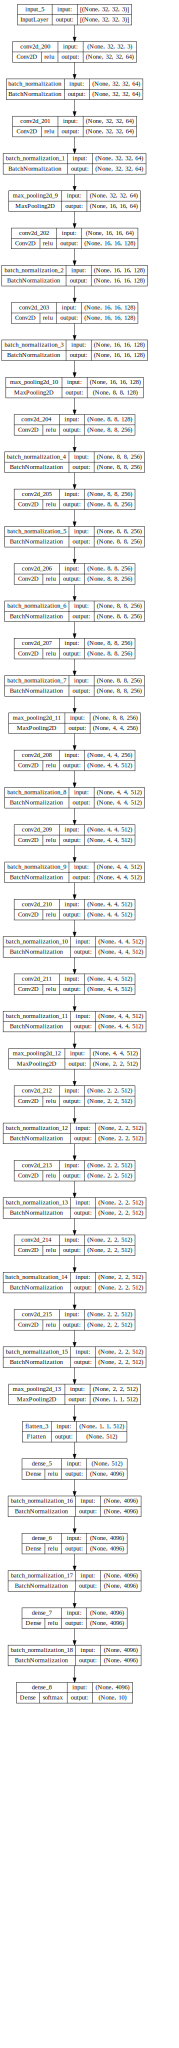

In [36]:
plotModel(vgg19)

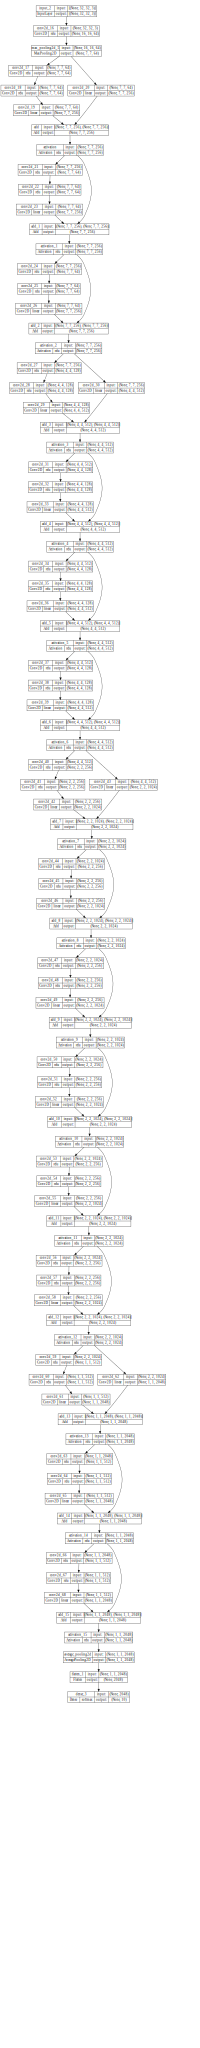

In [17]:
plotModel(resnet50)

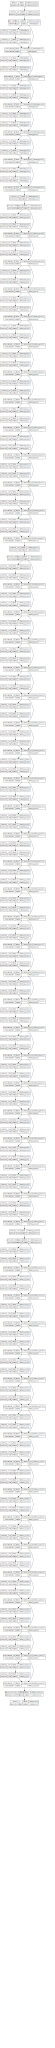

In [18]:
plotModel(denseNet)

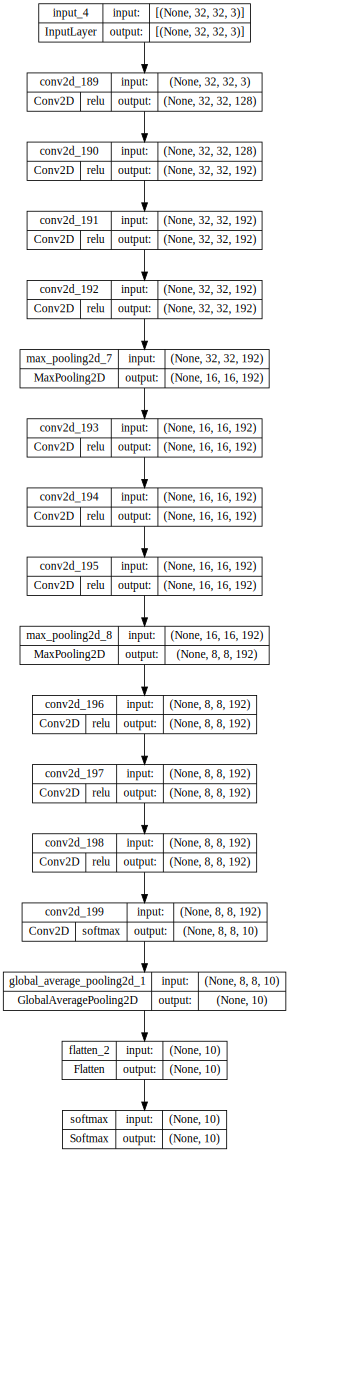

In [19]:
plotModel(NiN)

In [40]:
from keras.utils import image_dataset_from_directory


training, validation = image_dataset_from_directory('250000_Final',
                                      label_mode='categorical',
                                      image_size=(32, 32),
                                      validation_split=0.2,
                                      shuffle=True,
                                      seed=42,
                                      batch_size=1024,
                                      subset='both')



Found 252860 files belonging to 10 classes.
Using 202288 files for training.
Using 50572 files for validation.


In [29]:
training.class_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

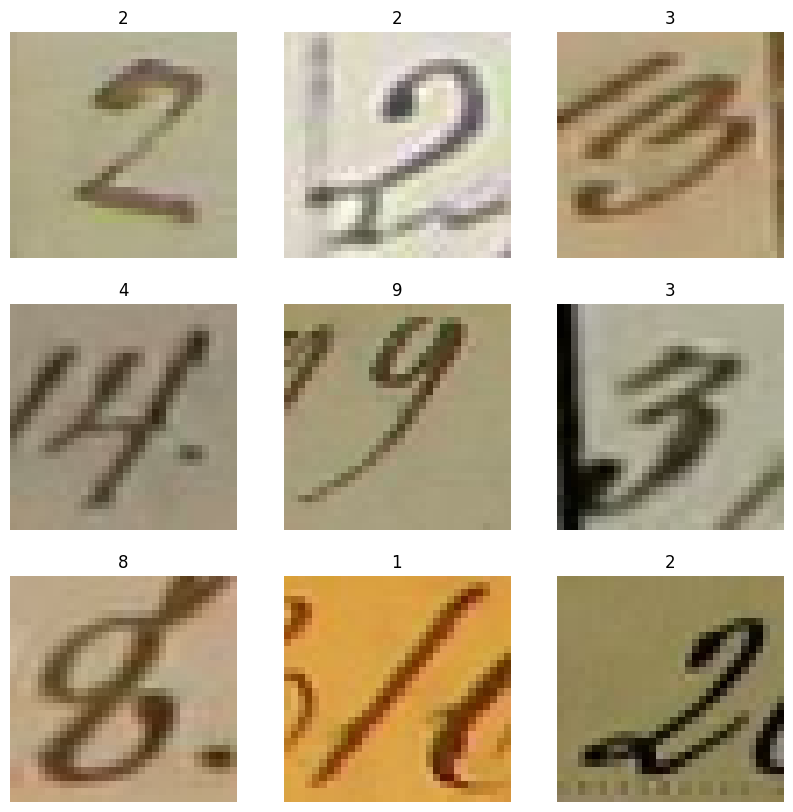

In [33]:
plt.figure(figsize=(10, 10))
for images, labels in training.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(np.argmax((labels[i])))
    plt.axis("off")

In [41]:
def process(images,labels):
    images = images/255.
    return images,labels

training = training.map(process, num_parallel_calls=tf.data.AUTOTUNE)
validation = validation.map(process, num_parallel_calls=tf.data.AUTOTUNE)

AUTOTUNE = tf.data.AUTOTUNE

training = training.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation = validation.cache().prefetch(buffer_size=AUTOTUNE)

In [42]:
checkpoint_path = "models/vgg19/cp.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 verbose=1)
vgg19_history = vgg19.fit(training, epochs=10, batch_size=1024, validation_data=validation, verbose=1, callbacks=[cp_callback])

Epoch 1/10
198/198 [==============================] - ETA: 0s - loss: 1.3035 - accuracy: 0.9924 - auc: 0.9994
Epoch 1: saving model to models/vgg16\cp.ckpt


INFO:tensorflow:Assets written to: models/vgg16\cp.ckpt\assets


INFO:tensorflow:Assets written to: models/vgg16\cp.ckpt\assets


198/198 [==============================] - 201s 682ms/step - loss: 1.3035 - accuracy: 0.9924 - auc: 0.9994 - val_loss: 1.2207 - val_accuracy: 0.9713 - val_auc: 0.9979
Epoch 2/10
198/198 [==============================] - ETA: 0s - loss: 0.9692 - accuracy: 0.9925 - auc: 0.9993
Epoch 2: saving model to models/vgg16\cp.ckpt


INFO:tensorflow:Assets written to: models/vgg16\cp.ckpt\assets


INFO:tensorflow:Assets written to: models/vgg16\cp.ckpt\assets


198/198 [==============================] - 127s 641ms/step - loss: 0.9692 - accuracy: 0.9925 - auc: 0.9993 - val_loss: 0.9787 - val_accuracy: 0.9544 - val_auc: 0.9959
Epoch 3/10
198/198 [==============================] - ETA: 0s - loss: 0.7341 - accuracy: 0.9928 - auc: 0.9993
Epoch 3: saving model to models/vgg16\cp.ckpt


INFO:tensorflow:Assets written to: models/vgg16\cp.ckpt\assets


INFO:tensorflow:Assets written to: models/vgg16\cp.ckpt\assets


198/198 [==============================] - 132s 667ms/step - loss: 0.7341 - accuracy: 0.9928 - auc: 0.9993 - val_loss: 0.7509 - val_accuracy: 0.9716 - val_auc: 0.9983
Epoch 4/10
198/198 [==============================] - ETA: 0s - loss: 0.5734 - accuracy: 0.9925 - auc: 0.9992
Epoch 4: saving model to models/vgg16\cp.ckpt


INFO:tensorflow:Assets written to: models/vgg16\cp.ckpt\assets


INFO:tensorflow:Assets written to: models/vgg16\cp.ckpt\assets


198/198 [==============================] - 127s 642ms/step - loss: 0.5734 - accuracy: 0.9925 - auc: 0.9992 - val_loss: 0.6603 - val_accuracy: 0.9598 - val_auc: 0.9953
Epoch 5/10
198/198 [==============================] - ETA: 0s - loss: 0.4593 - accuracy: 0.9928 - auc: 0.9991
Epoch 5: saving model to models/vgg16\cp.ckpt


INFO:tensorflow:Assets written to: models/vgg16\cp.ckpt\assets


INFO:tensorflow:Assets written to: models/vgg16\cp.ckpt\assets


198/198 [==============================] - 127s 641ms/step - loss: 0.4593 - accuracy: 0.9928 - auc: 0.9991 - val_loss: 1.5646 - val_accuracy: 0.8767 - val_auc: 0.9407
Epoch 6/10
198/198 [==============================] - ETA: 0s - loss: 0.3731 - accuracy: 0.9928 - auc: 0.9990
Epoch 6: saving model to models/vgg16\cp.ckpt


INFO:tensorflow:Assets written to: models/vgg16\cp.ckpt\assets


INFO:tensorflow:Assets written to: models/vgg16\cp.ckpt\assets


198/198 [==============================] - 128s 646ms/step - loss: 0.3731 - accuracy: 0.9928 - auc: 0.9990 - val_loss: 0.4386 - val_accuracy: 0.9755 - val_auc: 0.9977
Epoch 7/10
198/198 [==============================] - ETA: 0s - loss: 0.3099 - accuracy: 0.9934 - auc: 0.9990
Epoch 7: saving model to models/vgg16\cp.ckpt


INFO:tensorflow:Assets written to: models/vgg16\cp.ckpt\assets


INFO:tensorflow:Assets written to: models/vgg16\cp.ckpt\assets


198/198 [==============================] - 127s 640ms/step - loss: 0.3099 - accuracy: 0.9934 - auc: 0.9990 - val_loss: 0.3290 - val_accuracy: 0.9847 - val_auc: 0.9981
Epoch 8/10
198/198 [==============================] - ETA: 0s - loss: 0.2906 - accuracy: 0.9912 - auc: 0.9987
Epoch 8: saving model to models/vgg16\cp.ckpt


INFO:tensorflow:Assets written to: models/vgg16\cp.ckpt\assets


INFO:tensorflow:Assets written to: models/vgg16\cp.ckpt\assets


198/198 [==============================] - 127s 640ms/step - loss: 0.2906 - accuracy: 0.9912 - auc: 0.9987 - val_loss: 0.3753 - val_accuracy: 0.9714 - val_auc: 0.9979
Epoch 9/10
198/198 [==============================] - ETA: 0s - loss: 0.2463 - accuracy: 0.9925 - auc: 0.9988
Epoch 9: saving model to models/vgg16\cp.ckpt


INFO:tensorflow:Assets written to: models/vgg16\cp.ckpt\assets


INFO:tensorflow:Assets written to: models/vgg16\cp.ckpt\assets


198/198 [==============================] - 126s 638ms/step - loss: 0.2463 - accuracy: 0.9925 - auc: 0.9988 - val_loss: 0.2931 - val_accuracy: 0.9840 - val_auc: 0.9976
Epoch 10/10
198/198 [==============================] - ETA: 0s - loss: 0.2236 - accuracy: 0.9922 - auc: 0.9987
Epoch 10: saving model to models/vgg16\cp.ckpt


INFO:tensorflow:Assets written to: models/vgg16\cp.ckpt\assets


INFO:tensorflow:Assets written to: models/vgg16\cp.ckpt\assets


198/198 [==============================] - 127s 642ms/step - loss: 0.2236 - accuracy: 0.9922 - auc: 0.9987 - val_loss: 0.3400 - val_accuracy: 0.9732 - val_auc: 0.9943


In [49]:
checkpoint_path = "models/resnet50/cp.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 verbose=1)
resnet50_history = resnet50.fit(training, epochs=10, batch_size=1024, validation_data=validation, verbose=1, callbacks=[cp_callback])

Epoch 1/10
198/198 [==============================] - ETA: 0s - loss: 6.2058 - accuracy: 0.7393 - auc: 0.9618
Epoch 1: saving model to models/resnet50\cp.ckpt


INFO:tensorflow:Assets written to: models/resnet50\cp.ckpt\assets


INFO:tensorflow:Assets written to: models/resnet50\cp.ckpt\assets


198/198 [==============================] - 98s 470ms/step - loss: 6.2058 - accuracy: 0.7393 - auc: 0.9618 - val_loss: 6.7021 - val_accuracy: 0.1205 - val_auc: 0.5912
Epoch 2/10
198/198 [==============================] - ETA: 0s - loss: 3.6378 - accuracy: 0.9386 - auc: 0.9962
Epoch 2: saving model to models/resnet50\cp.ckpt


INFO:tensorflow:Assets written to: models/resnet50\cp.ckpt\assets


INFO:tensorflow:Assets written to: models/resnet50\cp.ckpt\assets


198/198 [==============================] - 93s 469ms/step - loss: 3.6378 - accuracy: 0.9386 - auc: 0.9962 - val_loss: 3.4020 - val_accuracy: 0.7876 - val_auc: 0.9742
Epoch 3/10
198/198 [==============================] - ETA: 0s - loss: 2.3465 - accuracy: 0.9738 - auc: 0.9988
Epoch 3: saving model to models/resnet50\cp.ckpt


INFO:tensorflow:Assets written to: models/resnet50\cp.ckpt\assets


INFO:tensorflow:Assets written to: models/resnet50\cp.ckpt\assets


198/198 [==============================] - 94s 477ms/step - loss: 2.3465 - accuracy: 0.9738 - auc: 0.9988 - val_loss: 2.0312 - val_accuracy: 0.9460 - val_auc: 0.9977
Epoch 4/10
198/198 [==============================] - ETA: 0s - loss: 1.6203 - accuracy: 0.9839 - auc: 0.9993
Epoch 4: saving model to models/resnet50\cp.ckpt


INFO:tensorflow:Assets written to: models/resnet50\cp.ckpt\assets


INFO:tensorflow:Assets written to: models/resnet50\cp.ckpt\assets


198/198 [==============================] - 96s 487ms/step - loss: 1.6203 - accuracy: 0.9839 - auc: 0.9993 - val_loss: 1.4076 - val_accuracy: 0.9749 - val_auc: 0.9987
Epoch 5/10
198/198 [==============================] - ETA: 0s - loss: 1.1865 - accuracy: 0.9867 - auc: 0.9994
Epoch 5: saving model to models/resnet50\cp.ckpt


INFO:tensorflow:Assets written to: models/resnet50\cp.ckpt\assets


INFO:tensorflow:Assets written to: models/resnet50\cp.ckpt\assets


198/198 [==============================] - 95s 482ms/step - loss: 1.1865 - accuracy: 0.9867 - auc: 0.9994 - val_loss: 1.1196 - val_accuracy: 0.9591 - val_auc: 0.9974
Epoch 6/10
198/198 [==============================] - ETA: 0s - loss: 0.9076 - accuracy: 0.9881 - auc: 0.9995
Epoch 6: saving model to models/resnet50\cp.ckpt


INFO:tensorflow:Assets written to: models/resnet50\cp.ckpt\assets


INFO:tensorflow:Assets written to: models/resnet50\cp.ckpt\assets


198/198 [==============================] - 97s 493ms/step - loss: 0.9076 - accuracy: 0.9881 - auc: 0.9995 - val_loss: 0.9401 - val_accuracy: 0.9498 - val_auc: 0.9957
Epoch 7/10
198/198 [==============================] - ETA: 0s - loss: 0.7211 - accuracy: 0.9887 - auc: 0.9995
Epoch 7: saving model to models/resnet50\cp.ckpt


INFO:tensorflow:Assets written to: models/resnet50\cp.ckpt\assets


INFO:tensorflow:Assets written to: models/resnet50\cp.ckpt\assets


198/198 [==============================] - 98s 494ms/step - loss: 0.7211 - accuracy: 0.9887 - auc: 0.9995 - val_loss: 0.7419 - val_accuracy: 0.9619 - val_auc: 0.9966
Epoch 8/10
198/198 [==============================] - ETA: 0s - loss: 0.5826 - accuracy: 0.9894 - auc: 0.9995
Epoch 8: saving model to models/resnet50\cp.ckpt


INFO:tensorflow:Assets written to: models/resnet50\cp.ckpt\assets


INFO:tensorflow:Assets written to: models/resnet50\cp.ckpt\assets


198/198 [==============================] - 92s 463ms/step - loss: 0.5826 - accuracy: 0.9894 - auc: 0.9995 - val_loss: 0.6067 - val_accuracy: 0.9667 - val_auc: 0.9975
Epoch 9/10
198/198 [==============================] - ETA: 0s - loss: 0.7695 - accuracy: 0.9814 - auc: 0.9989
Epoch 9: saving model to models/resnet50\cp.ckpt


INFO:tensorflow:Assets written to: models/resnet50\cp.ckpt\assets


INFO:tensorflow:Assets written to: models/resnet50\cp.ckpt\assets


198/198 [==============================] - 92s 467ms/step - loss: 0.7695 - accuracy: 0.9814 - auc: 0.9989 - val_loss: 3.7564 - val_accuracy: 0.7208 - val_auc: 0.8963
Epoch 10/10
198/198 [==============================] - ETA: 0s - loss: 0.7031 - accuracy: 0.9877 - auc: 0.9992
Epoch 10: saving model to models/resnet50\cp.ckpt


INFO:tensorflow:Assets written to: models/resnet50\cp.ckpt\assets


INFO:tensorflow:Assets written to: models/resnet50\cp.ckpt\assets


198/198 [==============================] - 92s 463ms/step - loss: 0.7031 - accuracy: 0.9877 - auc: 0.9992 - val_loss: 0.6754 - val_accuracy: 0.9469 - val_auc: 0.9973


In [58]:
checkpoint_path = "models/densenet/cp.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 verbose=1)
densenet_history = denseNet.fit(training, epochs=10, batch_size=1024, validation_data=validation, verbose=1, callbacks=[cp_callback])

Epoch 1/10
198/198 [==============================] - ETA: 0s - loss: 0.5513 - accuracy: 0.8124 - auc: 0.9813
Epoch 1: saving model to models/densenet\cp.ckpt


INFO:tensorflow:Assets written to: models/densenet\cp.ckpt\assets


INFO:tensorflow:Assets written to: models/densenet\cp.ckpt\assets


198/198 [==============================] - 114s 502ms/step - loss: 0.5513 - accuracy: 0.8124 - auc: 0.9813 - val_loss: 4.0973 - val_accuracy: 0.1108 - val_auc: 0.6272
Epoch 2/10
198/198 [==============================] - ETA: 0s - loss: 0.0885 - accuracy: 0.9715 - auc: 0.9987
Epoch 2: saving model to models/densenet\cp.ckpt


INFO:tensorflow:Assets written to: models/densenet\cp.ckpt\assets


INFO:tensorflow:Assets written to: models/densenet\cp.ckpt\assets


198/198 [==============================] - 98s 495ms/step - loss: 0.0885 - accuracy: 0.9715 - auc: 0.9987 - val_loss: 1.1043 - val_accuracy: 0.7026 - val_auc: 0.9394
Epoch 3/10
198/198 [==============================] - ETA: 0s - loss: 0.0487 - accuracy: 0.9844 - auc: 0.9993
Epoch 3: saving model to models/densenet\cp.ckpt


INFO:tensorflow:Assets written to: models/densenet\cp.ckpt\assets


INFO:tensorflow:Assets written to: models/densenet\cp.ckpt\assets


198/198 [==============================] - 98s 497ms/step - loss: 0.0487 - accuracy: 0.9844 - auc: 0.9993 - val_loss: 0.1827 - val_accuracy: 0.9426 - val_auc: 0.9957
Epoch 4/10
198/198 [==============================] - ETA: 0s - loss: 0.0320 - accuracy: 0.9899 - auc: 0.9996
Epoch 4: saving model to models/densenet\cp.ckpt


INFO:tensorflow:Assets written to: models/densenet\cp.ckpt\assets


INFO:tensorflow:Assets written to: models/densenet\cp.ckpt\assets


198/198 [==============================] - 98s 498ms/step - loss: 0.0320 - accuracy: 0.9899 - auc: 0.9996 - val_loss: 0.1036 - val_accuracy: 0.9692 - val_auc: 0.9976
Epoch 5/10
198/198 [==============================] - ETA: 0s - loss: 0.0256 - accuracy: 0.9916 - auc: 0.9997
Epoch 5: saving model to models/densenet\cp.ckpt


INFO:tensorflow:Assets written to: models/densenet\cp.ckpt\assets


INFO:tensorflow:Assets written to: models/densenet\cp.ckpt\assets


198/198 [==============================] - 98s 494ms/step - loss: 0.0256 - accuracy: 0.9916 - auc: 0.9997 - val_loss: 0.1016 - val_accuracy: 0.9685 - val_auc: 0.9979
Epoch 6/10
198/198 [==============================] - ETA: 0s - loss: 0.0204 - accuracy: 0.9934 - auc: 0.9998
Epoch 6: saving model to models/densenet\cp.ckpt


INFO:tensorflow:Assets written to: models/densenet\cp.ckpt\assets


INFO:tensorflow:Assets written to: models/densenet\cp.ckpt\assets


198/198 [==============================] - 98s 496ms/step - loss: 0.0204 - accuracy: 0.9934 - auc: 0.9998 - val_loss: 0.2028 - val_accuracy: 0.9460 - val_auc: 0.9932
Epoch 7/10
198/198 [==============================] - ETA: 0s - loss: 0.0196 - accuracy: 0.9936 - auc: 0.9998
Epoch 7: saving model to models/densenet\cp.ckpt


INFO:tensorflow:Assets written to: models/densenet\cp.ckpt\assets


INFO:tensorflow:Assets written to: models/densenet\cp.ckpt\assets


198/198 [==============================] - 102s 518ms/step - loss: 0.0196 - accuracy: 0.9936 - auc: 0.9998 - val_loss: 0.0896 - val_accuracy: 0.9738 - val_auc: 0.9980
Epoch 8/10
198/198 [==============================] - ETA: 0s - loss: 0.0142 - accuracy: 0.9953 - auc: 0.9998
Epoch 8: saving model to models/densenet\cp.ckpt


INFO:tensorflow:Assets written to: models/densenet\cp.ckpt\assets


INFO:tensorflow:Assets written to: models/densenet\cp.ckpt\assets


198/198 [==============================] - 107s 541ms/step - loss: 0.0142 - accuracy: 0.9953 - auc: 0.9998 - val_loss: 0.1321 - val_accuracy: 0.9642 - val_auc: 0.9961
Epoch 9/10
198/198 [==============================] - ETA: 0s - loss: 0.0143 - accuracy: 0.9950 - auc: 0.9999
Epoch 9: saving model to models/densenet\cp.ckpt


INFO:tensorflow:Assets written to: models/densenet\cp.ckpt\assets


INFO:tensorflow:Assets written to: models/densenet\cp.ckpt\assets


198/198 [==============================] - 107s 540ms/step - loss: 0.0143 - accuracy: 0.9950 - auc: 0.9999 - val_loss: 0.0701 - val_accuracy: 0.9815 - val_auc: 0.9979
Epoch 10/10
198/198 [==============================] - ETA: 0s - loss: 0.0117 - accuracy: 0.9961 - auc: 0.9999
Epoch 10: saving model to models/densenet\cp.ckpt


INFO:tensorflow:Assets written to: models/densenet\cp.ckpt\assets


INFO:tensorflow:Assets written to: models/densenet\cp.ckpt\assets


198/198 [==============================] - 100s 505ms/step - loss: 0.0117 - accuracy: 0.9961 - auc: 0.9999 - val_loss: 0.2395 - val_accuracy: 0.9405 - val_auc: 0.9913


In [62]:
checkpoint_path = "models/NiN/cp.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 verbose=1)
nin_history = NiN.fit(training, epochs=10, batch_size=1024, validation_data=validation, verbose=1, callbacks=[cp_callback])

Epoch 1/10


ResourceExhaustedError: Graph execution error:

Detected at node 'model_9/batch_normalization_327/FusedBatchNormV3' defined at (most recent call last):
    File "F:\Program\Python39\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "F:\Program\Python39\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\vigge93\Desktop\BTH\DV2586-Deep-Machine-Learning\venv\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\vigge93\Desktop\BTH\DV2586-Deep-Machine-Learning\venv\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "c:\Users\vigge93\Desktop\BTH\DV2586-Deep-Machine-Learning\venv\lib\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "c:\Users\vigge93\Desktop\BTH\DV2586-Deep-Machine-Learning\venv\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "F:\Program\Python39\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "F:\Program\Python39\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "F:\Program\Python39\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\vigge93\Desktop\BTH\DV2586-Deep-Machine-Learning\venv\lib\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "c:\Users\vigge93\Desktop\BTH\DV2586-Deep-Machine-Learning\venv\lib\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "c:\Users\vigge93\Desktop\BTH\DV2586-Deep-Machine-Learning\venv\lib\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "c:\Users\vigge93\Desktop\BTH\DV2586-Deep-Machine-Learning\venv\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "c:\Users\vigge93\Desktop\BTH\DV2586-Deep-Machine-Learning\venv\lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "c:\Users\vigge93\Desktop\BTH\DV2586-Deep-Machine-Learning\venv\lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\vigge93\Desktop\BTH\DV2586-Deep-Machine-Learning\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "c:\Users\vigge93\Desktop\BTH\DV2586-Deep-Machine-Learning\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "c:\Users\vigge93\Desktop\BTH\DV2586-Deep-Machine-Learning\venv\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\vigge93\Desktop\BTH\DV2586-Deep-Machine-Learning\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\vigge93\Desktop\BTH\DV2586-Deep-Machine-Learning\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\vigge93\Desktop\BTH\DV2586-Deep-Machine-Learning\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\vigge93\AppData\Local\Temp\ipykernel_19268\135536886.py", line 4, in <module>
      nin_history = NiN.fit(training, epochs=10, batch_size=1024, validation_data=validation, verbose=1, callbacks=[cp_callback])
    File "c:\Users\vigge93\Desktop\BTH\DV2586-Deep-Machine-Learning\venv\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\vigge93\Desktop\BTH\DV2586-Deep-Machine-Learning\venv\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\vigge93\Desktop\BTH\DV2586-Deep-Machine-Learning\venv\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "c:\Users\vigge93\Desktop\BTH\DV2586-Deep-Machine-Learning\venv\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\vigge93\Desktop\BTH\DV2586-Deep-Machine-Learning\venv\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "c:\Users\vigge93\Desktop\BTH\DV2586-Deep-Machine-Learning\venv\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\vigge93\Desktop\BTH\DV2586-Deep-Machine-Learning\venv\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\vigge93\Desktop\BTH\DV2586-Deep-Machine-Learning\venv\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\vigge93\Desktop\BTH\DV2586-Deep-Machine-Learning\venv\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\vigge93\Desktop\BTH\DV2586-Deep-Machine-Learning\venv\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\vigge93\Desktop\BTH\DV2586-Deep-Machine-Learning\venv\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\vigge93\Desktop\BTH\DV2586-Deep-Machine-Learning\venv\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\vigge93\Desktop\BTH\DV2586-Deep-Machine-Learning\venv\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\vigge93\Desktop\BTH\DV2586-Deep-Machine-Learning\venv\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\vigge93\Desktop\BTH\DV2586-Deep-Machine-Learning\venv\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\vigge93\Desktop\BTH\DV2586-Deep-Machine-Learning\venv\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\vigge93\Desktop\BTH\DV2586-Deep-Machine-Learning\venv\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 850, in call
      outputs = self._fused_batch_norm(inputs, training=training)
    File "c:\Users\vigge93\Desktop\BTH\DV2586-Deep-Machine-Learning\venv\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 660, in _fused_batch_norm
      output, mean, variance = control_flow_util.smart_cond(
    File "c:\Users\vigge93\Desktop\BTH\DV2586-Deep-Machine-Learning\venv\lib\site-packages\keras\utils\control_flow_util.py", line 108, in smart_cond
      return tf.__internal__.smart_cond.smart_cond(
    File "c:\Users\vigge93\Desktop\BTH\DV2586-Deep-Machine-Learning\venv\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 634, in _fused_batch_norm_training
      return tf.compat.v1.nn.fused_batch_norm(
Node: 'model_9/batch_normalization_327/FusedBatchNormV3'
OOM when allocating tensor with shape[1024,128,32,32] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node model_9/batch_normalization_327/FusedBatchNormV3}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_2039690]

In [64]:
vgg19_history.history.keys()

dict_keys(['loss', 'accuracy', 'auc', 'val_loss', 'val_accuracy', 'val_auc'])

In [82]:
plt.plot(vgg19_history.history['loss'], label='Training loss')
plt.plot(vgg19_history.history['val_loss'], label='Validation loss')
plt.legend()
plt.title('Training and validation loss for VGG19')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()
plt.plot(vgg19_history.history['accuracy'], label='Training accuracy')
plt.plot(vgg19_history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.title('Training and validation accuracy for VGG19')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')


NameError: name 'vgg19_history' is not defined

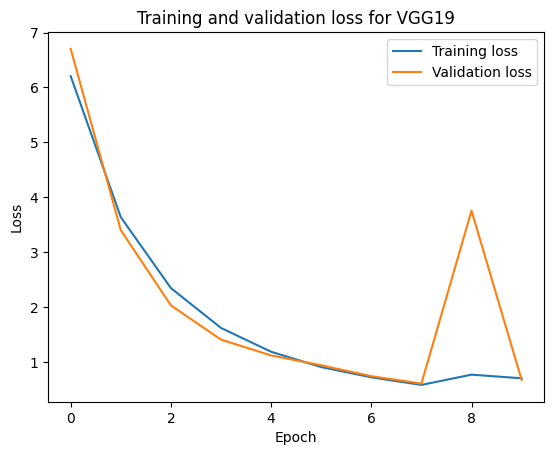

Text(0.5, 0, 'Epoch')

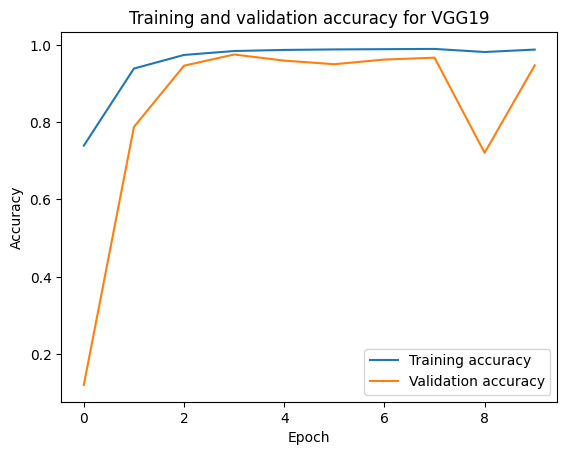

In [83]:
plt.plot(resnet50_history.history['loss'], label='Training loss')
plt.plot(resnet50_history.history['val_loss'], label='Validation loss')
plt.legend()
plt.title('Training and validation loss for ResNet50')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()
plt.plot(resnet50_history.history['accuracy'], label='Training accuracy')
plt.plot(resnet50_history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.title('Training and validation accuracy for ResNet50')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')


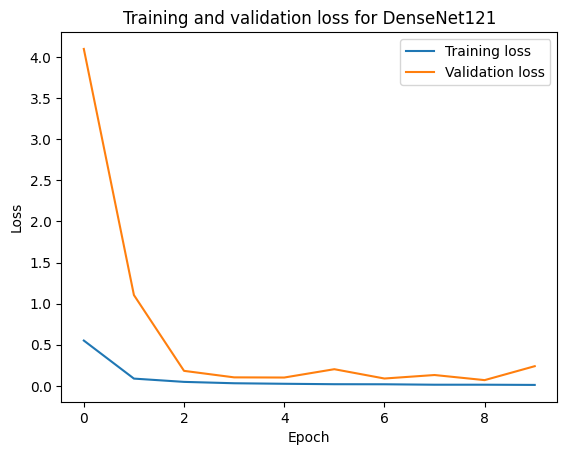

Text(0.5, 0, 'Epoch')

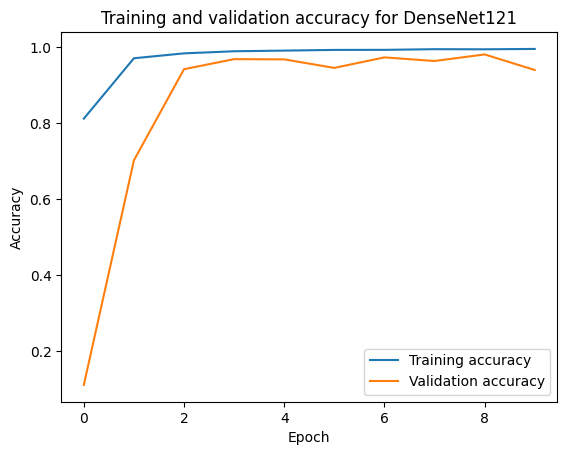

In [85]:
plt.plot(densenet_history.history['loss'], label='Training loss')
plt.plot(densenet_history.history['val_loss'], label='Validation loss')
plt.legend()
plt.title('Training and validation loss for DenseNet121')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()
plt.plot(densenet_history.history['accuracy'], label='Training accuracy')
plt.plot(densenet_history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.title('Training and validation accuracy for DenseNet121')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')


In [86]:
plt.plot(nin_history.history['loss'], label='Training loss')
plt.plot(nin_history.history['val_loss'], label='Validation loss')
plt.legend()
plt.title('Training and validation loss for NiN')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()
plt.plot(nin_history.history['accuracy'], label='Training accuracy')
plt.plot(nin_history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.title('Training and validation accuracy for NiN')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')


NameError: name 'nin_history' is not defined

In [ ]:
vgg19_predictions = vgg19.predict(validation)
resnet50_predictions = resnet50.predict(validation)
densenet_predictions = denseNet.predict(validation)
NiN_predictions = NiN.predict(validation)

In [ ]:
validation_ds = tf.data.Dataset.from_tensor_slices(list(validation))
validation_ds

NameError: name 'validation' is not defined